In [59]:
import pandas as pd
import statsmodels.api as sm 
import matplotlib.pyplot as plt 

Questão 7 - letra a)
Um gráfico com as duas séries temporais. O que você pode dizer sobre o comportamento das
duas séries?


In [5]:
#Puxando a base de dados 

bases = (pd.read_excel("/Users/joaopedro/Desktop/ipeadata_series.xls"))
bases

,Data,"PIB - preços de mercado - índice real encadeado dessazonalizado (média 1995 = 100) - - - Instituto Brasileiro de Geografia e Estatística, Sistema de Contas Nacionais Trimestrais (IBGE/SCN Trimestral) - SCN104_PIBPMAS104 -","PIB - consumo final - famílias - índice real encadeado dessazonalizado (média 1995 = 100) - - - Instituto Brasileiro de Geografia e Estatística, Sistema de Contas Nacionais Trimestrais (IBGE/SCN Trimestral) - SCN104_PIBCPPAS104 -"
0,1996 T1,99.547352,98.046192
1,1996 T2,100.437496,100.926132
2,1996 T3,104.370983,103.682404
3,1996 T4,103.299776,109.151559
4,1997 T1,104.314965,106.947170
...,...,...,...
100,2021 T1,171.537881,179.152649
101,2021 T2,171.166438,179.140832
102,2021 T3,171.275187,180.601254
103,2021 T4,172.409395,181.893244


In [8]:
# Tratando as bases

bases.columns= ["Data", "PIB - preços de mercado", "Comsumo final - familias"]

bases.head()

,Data,PIB - preços de mercado,Comsumo final - familias
0,1996 T1,99.547352,98.046192
1,1996 T2,100.437496,100.926132
2,1996 T3,104.370983,103.682404
3,1996 T4,103.299776,109.151559
4,1997 T1,104.314965,106.947170


In [9]:
bases.round(2)

,Data,PIB - preços de mercado,Comsumo final - familias
0,1996 T1,99.55,98.05
1,1996 T2,100.44,100.93
2,1996 T3,104.37,103.68
3,1996 T4,103.30,109.15
4,1997 T1,104.31,106.95
...,...,...,...
100,2021 T1,171.54,179.15
101,2021 T2,171.17,179.14
102,2021 T3,171.28,180.60
103,2021 T4,172.41,181.89


In [10]:
# Corrigindo as datas
bases["Data"] = pd.DatetimeIndex(bases["Data"])

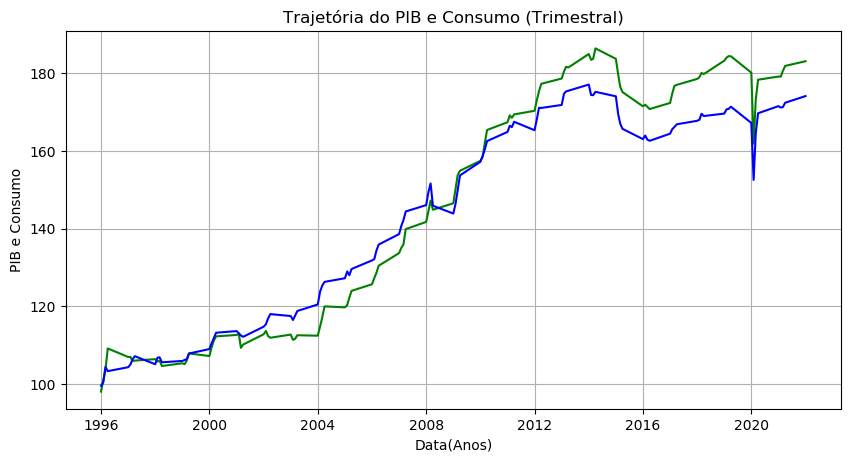

In [16]:
# Plotando os Gráficos 

plt.figure(figsize=(10,5), dpi=100)
plt.plot(bases["Data"], bases["Comsumo final - familias"], label= "Consumo Fam.", c= "g") 
plt.plot(bases["Data"], bases["PIB - preços de mercado"], label= "PIB", c= "b") 
plt.xlabel("Data(Anos)")
plt.ylabel("PIB e Consumo")
plt.title("Trajetória do PIB e Consumo (Trimestral)")
plt.grid()
plt.plot()
plt.show()

O PIB e o consumo possuem uma trajetória parecida ao longo da série.

b) Aplicando o filtro Hodrick-Prescott

In [50]:
# Aplicando o filtro HP para o PIB e Consumo

bases["PIB (Ciclico)"], bases["PIB (tendência)"] = sm.tsa.filters.hpfilter(bases["PIB - preços de mercado"])
bases["Consumo (Ciclico)"], bases["Consumo (Tendência)"] = sm.tsa.filters.hpfilter(bases["Comsumo final - familias"])


In [51]:
bases.head()

,Data,PIB - preços de mercado,Comsumo final - familias,PIB - Ciclico,PIB - tendência,PIB (Ciclico),PIB (tendência),Consumo (Ciclico),Consumo (Tendência)
0,1996-01-01,99.547352,98.046192,-1.901785,101.449136,-1.901785,101.449136,-4.825601,102.871793
1,1996-02-01,100.437496,100.926132,-1.505006,101.942501,-1.505006,101.942501,-2.314729,103.240861
2,1996-03-01,104.370983,103.682404,1.936305,102.434678,1.936305,102.434678,0.075490,103.606914
3,1996-04-01,103.299776,109.151559,0.376239,102.923537,0.376239,102.923537,5.186071,103.965488
4,1997-01-01,104.314965,106.947170,0.906806,103.408159,0.906806,103.408159,2.635003,104.312167


In [52]:
# Desvio padrão da série
bases.std()

PIB - preços de mercado     26.246285
Comsumo final - familias    31.061290
PIB - Ciclico                2.963045
PIB - tendência             25.940531
PIB (Ciclico)                2.963045
PIB (tendência)             25.940531
Consumo (Ciclico)            3.348211
Consumo (Tendência)         30.705159
dtype: float64

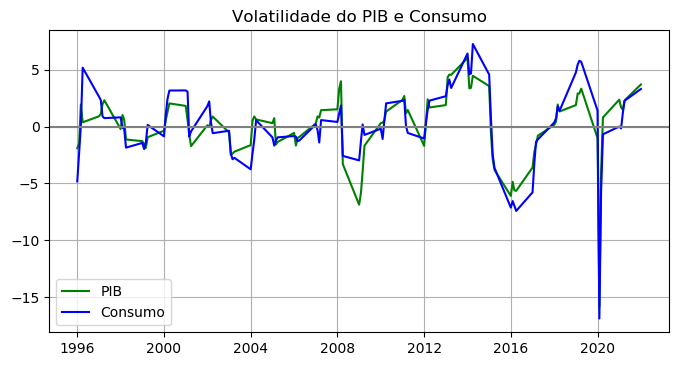

In [58]:
#Plotando volatilidade de PIB e Consumo
plt.figure(figsize=(8, 4), dpi=100)
plt.title('Volatilidade do PIB e Consumo')
plt.grid()
plt.plot(bases["Data"],bases["PIB (Ciclico)"], label="PIB", c="g")
plt.plot(bases["Data"],bases["Consumo (Ciclico)"], label="Consumo", c="blue")
plt.axhline(y=0, color="grey")
plt.legend()
plt.show()

O consumo possui uma volatilidade maior que o PIB.